In [1]:
import pandas as pd

In [2]:
# Load data
data = pd.read_csv('/kaggle/input/sentimenmobillistrik/mobil_listrik.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_komentar    1517 non-null   object
 1   nama_akun      1516 non-null   object
 2   tanggal        1517 non-null   object
 3   text_cleaning  1515 non-null   object
 4   sentimen       1517 non-null   object
dtypes: object(5)
memory usage: 59.4+ KB


In [4]:
# Mengecek duplikasi pada kolom 'id_komentar'
duplikasi_id_komentar = data[data.duplicated(subset=['id_komentar'], keep=False)]
print(f"Jumlah duplikasi pada kolom 'id_komentar': {len(duplikasi_id_komentar)}")
if not duplikasi_id_komentar.empty:
    print("Data duplikat berdasarkan kolom 'id_komentar':")
    print(duplikasi_id_komentar)
else:
    print("Tidak ada duplikasi pada kolom 'id_komentar'.")

Jumlah duplikasi pada kolom 'id_komentar': 0
Tidak ada duplikasi pada kolom 'id_komentar'.


In [5]:
# Mengecek duplikasi pada kolom 'nama_akun'
duplikasi_nama_akun = data[data.duplicated(subset=['nama_akun'], keep=False)]
print(f"Jumlah duplikasi pada kolom 'nama_akun': {len(duplikasi_nama_akun)}")
if not duplikasi_nama_akun.empty:
    print("Data duplikat berdasarkan kolom 'nama_akun':")
    print(duplikasi_nama_akun)
else:
    print("Tidak ada duplikasi pada kolom 'nama_akun'.")

Jumlah duplikasi pada kolom 'nama_akun': 2
Data duplikat berdasarkan kolom 'nama_akun':
                     id_komentar nama_akun                    tanggal  \
976   UgzrIme6uSs4MNMLKPF4AaABAg    Albert  2023-06-07 03:03:23+00:00   
1420  UgzdMErvwsK1yxsHxZd4AaABAg    Albert  2023-03-16 07:40:11+00:00   

                                          text_cleaning sentimen  
976   title berita tak laku at the same time tampil ...  negatif  
1420  suka banget kak shania bawain berita si cantik...  negatif  


In [6]:
data.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [7]:
data = data[['text_cleaning','sentimen']]

In [8]:
!pip install Sastrawi

import re
import nltk
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Install NLTK data
nltk.download('punkt')

# Initialize Sastrawi
stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()

def print_separator(extra=''):
    """
    Print a separator line.
    Args:
    extra (str): Additional string to print after the separator.
    """
    print('-' * 63 + extra)

def remove_duplicates(data):
    """
    Remove duplicate entries from the DataFrame.
    Args:
    data (DataFrame): The DataFrame to process.
    Returns:
    DataFrame: The DataFrame after duplicates are removed.
    """
    print("Jumlah duplikasi sebelum penghapusan:", data.duplicated().sum())
    data = data.drop_duplicates()
    print_separator()
    print("Jumlah duplikasi setelah penghapusan:", data.duplicated().sum())
    print_separator('\n')
    return data

def fill_missing_values(data):
    """
    Fill missing values in the DataFrame.
    Args:
    data (DataFrame): The DataFrame to process.
    Returns:
    DataFrame: The DataFrame after missing values are filled.
    """
    print("Jumlah nilai kosong sebelum pengisian:", data.isna().sum())
    print_separator()
    data = data.fillna({'text_cleaning': ''})
    print("Jumlah nilai kosong setelah pengisian:", data.isna().sum())
    print_separator('\n')
    return data

def remove_special_characters(text):
    """
    Remove special characters and numbers from text.
    """
    return re.sub(r'[^a-zA-Z\s]', '', text)

def clean_text(text):
    """
    Normalize whitespace and lowercase the text.
    """
    return re.sub(r'\s+', ' ', text).strip().lower()

def remove_short_words(text):
    """
    Remove words shorter than 3 characters.
    """
    return ' '.join([w for w in text.split() if len(w) > 3])

def tokenize(text):
    """
    Tokenize text into words.
    """
    return word_tokenize(text)

def stopword_removal(word_tokens):
    """
    Remove stopwords using Sastrawi.
    """
    text = ' '.join(word_tokens)
    filtered_text = stop_words_remover_new.remove(text)
    return filtered_text.split()

def stemming(word_tokens):
    """
    Perform stemming on tokenized words.
    """
    return ' '.join([stemmer.stem(w) for w in word_tokens])

def process_text_data(data):
    """
    Main function to clean and preprocess text data.
    """
    data = remove_duplicates(data)
    data = fill_missing_values(data)
    data['text_cleaning'] = data['text_cleaning'].apply(remove_special_characters)
    data['text_cleaning'] = data['text_cleaning'].apply(clean_text)
    data['text_cleaning'] = data['text_cleaning'].apply(remove_short_words)
    data['text_cleaning'] = data['text_cleaning'].apply(tokenize)
    print("Hasil tokenisasi:\n", data['text_cleaning'].head(10))
    data['text_cleaning'] = data['text_cleaning'].apply(stopword_removal)
    print("Hasil setelah penghapusan stopwords:\n", data['text_cleaning'].head(10))
    data['text_cleaning'] = data['text_cleaning'].apply(stemming)
    data['text_cleaning'] = data['text_cleaning'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
    print("Hasil akhir setelah stemming:\n", data['text_cleaning'].head(10))
    return data

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
# Process data
data = process_text_data(data)

Jumlah duplikasi sebelum penghapusan: 2
---------------------------------------------------------------
Jumlah duplikasi setelah penghapusan: 0
---------------------------------------------------------------

Jumlah nilai kosong sebelum pengisian: text_cleaning    1
sentimen         0
dtype: int64
---------------------------------------------------------------
Jumlah nilai kosong setelah pengisian: text_cleaning    0
sentimen         0
dtype: int64
---------------------------------------------------------------

Hasil tokenisasi:
 0    [saran, bikin, harga, ionic, sama, kayak, brio...
1    [problem, subsidi, kualitas, diturunin, harga,...
2    [baik, kualitas, kembang, dulu, baik, kualitas...
3    [model, jelek, kwalitas, buruk, harga, mahal, ...
4    [syarat, ngaco, anak, muda, blom, punya, rumah...
5    [harga, motor, mahal, masa, harga, mirip, moto...
6    [keren, berita, plus, padahal, lokal, merk, ba...
7    [proses, kenal, produk, baru, butuh, waktu, ga...
8                      

In [10]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sentimen'] = le.fit_transform(data['sentimen'])

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['text_cleaning'])
y = data['sentimen']

In [12]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(pd.Series(y_resampled).value_counts())

sentimen
2    869
0    869
1    869
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
from itertools import combinations
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Perform GridSearchCV for the SVM model with return_train_score=True
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Retrieve the best estimator and parameters
best_svm_model = grid_search.best_estimator_
print(f"Best params for SVM: {grid_search.best_params_}")
print(f"Best cross-validated score for SVM: {grid_search.best_score_}")
print("-" * 80)

# Evaluate the optimized SVM model on the test set
from sklearn.metrics import accuracy_score, classification_report

# Predict using the optimized SVM model
y_pred_best_svm = best_svm_model.predict(X_test)

# Evaluation
print("Optimized SVM Accuracy on Test Set:", accuracy_score(y_test, y_pred_best_svm))
print(classification_report(y_test, y_pred_best_svm))


Best params for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validated score for SVM: 0.8877697841726618
--------------------------------------------------------------------------------
Optimized SVM Accuracy on Test Set: 0.921455938697318
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       169
           1       0.99      0.98      0.99       174
           2       0.95      0.84      0.89       179

    accuracy                           0.92       522
   macro avg       0.93      0.92      0.92       522
weighted avg       0.93      0.92      0.92       522



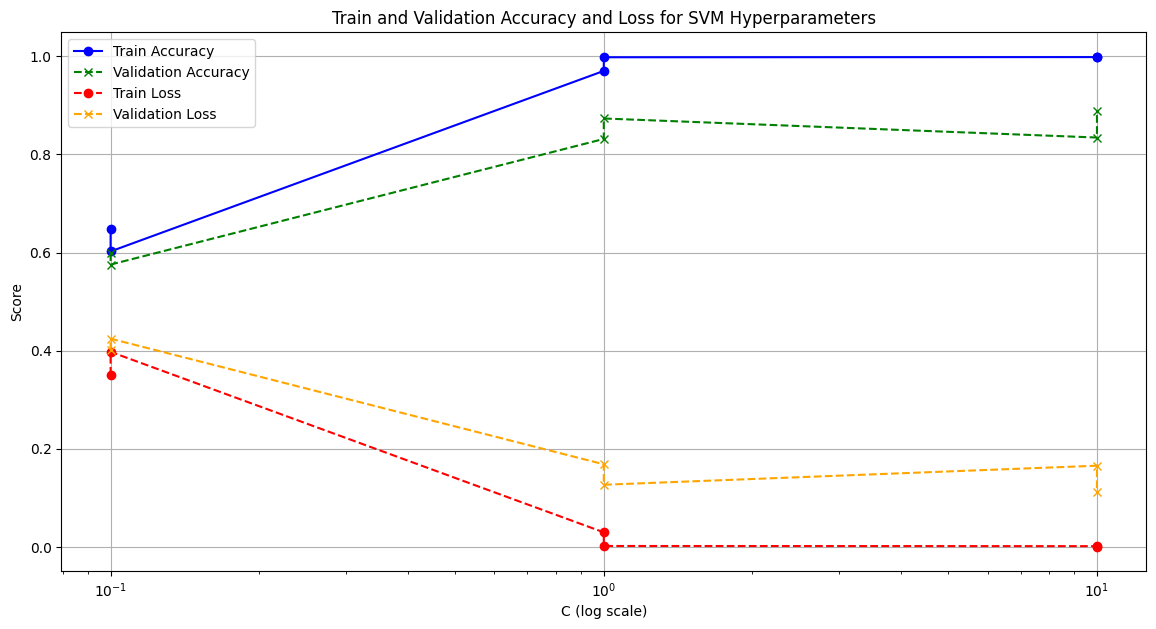

In [16]:
import matplotlib.pyplot as plt

# Ambil hasil GridSearchCV
results = grid_search.cv_results_

# Ambil parameter C
param_C = [param['C'] for param in results['params']]

# Skor rata-rata pelatihan dan validasi
mean_train_scores = results['mean_train_score']
mean_test_scores = results['mean_test_score']

# Menghitung validasi loss (1 - validasi accuracy)
mean_test_losses = 1 - mean_test_scores
mean_train_losses = 1 - mean_train_scores

# Membuat figure
plt.figure(figsize=(14, 7))

# Plot akurasi pelatihan dan validasi
plt.plot(param_C, mean_train_scores, marker='o', linestyle='-', color='b', label='Train Accuracy')
plt.plot(param_C, mean_test_scores, marker='x', linestyle='--', color='g', label='Validation Accuracy')

# Plot loss pelatihan dan validasi
plt.plot(param_C, mean_train_losses, marker='o', linestyle='--', color='r', label='Train Loss')
plt.plot(param_C, mean_test_losses, marker='x', linestyle='--', color='orange', label='Validation Loss')

# Labeling
plt.xscale('log')  # Menggunakan skala log untuk parameter C
plt.xlabel('C (log scale)')
plt.ylabel('Score')
plt.title('Train and Validation Accuracy and Loss for SVM Hyperparameters')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes model
nb_model = MultinomialNB()

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0]
}

# Perform GridSearchCV for the Naive Bayes model
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)

# Retrieve the best estimator and parameters
best_nb_model = grid_search_nb.best_estimator_
print(f"Best params for Naive Bayes: {grid_search_nb.best_params_}")
print(f"Best cross-validated score for Naive Bayes: {grid_search_nb.best_score_}")
print("-" * 80)

# Predict using the optimized Naive Bayes model
y_pred_best_nb = best_nb_model.predict(X_test)

# Evaluation
print("Optimized Naive Bayes Accuracy on Test Set:", accuracy_score(y_test, y_pred_best_nb))
print(classification_report(y_test, y_pred_best_nb))


Best params for Naive Bayes: {'alpha': 0.1}
Best cross-validated score for Naive Bayes: 0.8100719424460431
--------------------------------------------------------------------------------
Optimized Naive Bayes Accuracy on Test Set: 0.842911877394636
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       169
           1       0.84      0.94      0.89       174
           2       0.84      0.82      0.83       179

    accuracy                           0.84       522
   macro avg       0.84      0.84      0.84       522
weighted avg       0.84      0.84      0.84       522



In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Membuat dan melatih model Deep Learning
dl_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.3),
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(3, activation='softmax')  # Output layer (3 kelas sentimen)
])

# Compile dl_model dengan learning rate lebih kecil
dl_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), 
                 loss='sparse_categorical_crossentropy', 
                 metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Melatih dl_model
history = dl_model.fit(
    X_train.toarray(), y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr]
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - accuracy: 0.3437 - loss: 1.0986 - val_accuracy: 0.3933 - val_loss: 1.0963 - learning_rate: 1.0000e-04
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4270 - loss: 1.0947 - val_accuracy: 0.4772 - val_loss: 1.0935 - learning_rate: 1.0000e-04
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4937 - loss: 1.0910 - val_accuracy: 0.5204 - val_loss: 1.0904 - learning_rate: 1.0000e-04
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5332 - loss: 1.0864 - val_accuracy: 0.5635 - val_loss: 1.0863 - learning_rate: 1.0000e-04
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5411 - loss: 1.0822 - val_accuracy: 0.5875 - val_loss: 1.0810 - learning_rate: 1.0000e-04
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6399 - loss: 1.0728 - val_accuracy: 0.6163 - val_loss: 1.0740 - learning_rate: 1.0000e-04
Epoch 7/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6512

In [20]:
# Evaluasi model pada data uji
loss, accuracy = dl_model.evaluate(X_test.toarray(), y_test)
print(f"Deep Learning Model Accuracy on Test Set: {accuracy}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8897 - loss: 0.3185
Deep Learning Model Accuracy on Test Set: 0.8831417560577393


In [21]:
# Prediksi probabilitas pada data uji menggunakan dl_model
y_pred_probs = dl_model.predict(X_test.toarray())

# Mengambil kelas dengan probabilitas tertinggi
y_pred_classes = y_pred_probs.argmax(axis=1)

# Classification report dan confusion matrix
print("=== Deep Learning Model Evaluation ===")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
=== Deep Learning Model Evaluation ===

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.86      0.85      0.85       169
     Class 1       0.87      0.98      0.92       174
     Class 2       0.92      0.83      0.87       179

    accuracy                           0.88       522
   macro avg       0.88      0.88      0.88       522
weighted avg       0.88      0.88      0.88       522


Confusion Matrix:
[[143  15  11]
 [  2 170   2]
 [ 21  10 148]]


In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from itertools import combinations
import numpy as np

# Daftar model tradisional + Deep Learning model
model_list = [
    ('svm', best_svm_model),
    ('nb', best_nb_model),
    ('dl', dl_model)  # Tambahkan Deep Learning model
]

# Fungsi untuk probabilitas prediksi dari semua model
def get_ensemble_predictions(models, X_test, dl_model=None):
    """
    Menggabungkan prediksi probabilitas dari model tradisional dan Deep Learning.
    Args:
        models (list): Daftar model tradisional.
        X_test (array): Data uji.
        dl_model (Sequential): Model Deep Learning.
    Returns:
        np.array: Prediksi probabilitas rata-rata.
    """
    probs = []

    # Probabilitas dari model tradisional
    for name, model in models:
        if name == 'dl' and dl_model:  # Prediksi dari dl_model
            dl_probs = dl_model.predict(X_test.toarray())
            probs.append(dl_probs)
        elif hasattr(model, "predict_proba"):
            probs.append(model.predict_proba(X_test))
        else:
            probs.append(np.eye(3)[model.predict(X_test)])  # One-hot encoding untuk model tanpa predict_proba

    # Rata-rata probabilitas
    return np.mean(probs, axis=0)

# Tes semua kombinasi model
best_accuracy = 0
best_combination = None
best_classifier = None

for r in range(2, len(model_list) + 1):  # Tambahkan semua model
    for combo in combinations(model_list, r):
        # Periksa apakah dl_model termasuk
        include_dl = any(name == 'dl' for name, _ in combo)
        combo_models = [(name, model) for name, model in combo if name != 'dl']

        # Hitung probabilitas ensemble
        ensemble_probs = get_ensemble_predictions(combo_models, X_test, dl_model=dl_model if include_dl else None)
        y_pred_ensemble = np.argmax(ensemble_probs, axis=1)

        # Evaluasi akurasi
        accuracy = accuracy_score(y_test, y_pred_ensemble)
        print(f"Combination: {[name for name, _ in combo]} - Accuracy: {accuracy}")

        # Update model terbaik
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_combination = [name for name, _ in combo]
            best_classifier = combo

# Tampilkan hasil terbaik
print("\nBest Combination:", best_combination)
print("Best Accuracy on Test Set:", best_accuracy)

# Hasil akhir dengan kombinasi terbaik
ensemble_probs_best = get_ensemble_predictions(
    [(name, model) for name, model in best_classifier if name != 'dl'], 
    X_test, 
    dl_model=dl_model if 'dl' in best_combination else None
)
y_pred_best = np.argmax(ensemble_probs_best, axis=1)
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix for Best Combination:")
print(confusion_matrix(y_test, y_pred_best))

Combination: ['svm', 'nb'] - Accuracy: 0.921455938697318
Combination: ['svm', 'dl'] - Accuracy: 0.921455938697318
Combination: ['nb', 'dl'] - Accuracy: 0.842911877394636
Combination: ['svm', 'nb', 'dl'] - Accuracy: 0.921455938697318

Best Combination: ['svm', 'nb']
Best Accuracy on Test Set: 0.921455938697318
              precision    recall  f1-score   support

           0       0.84      0.95      0.89       169
           1       0.99      0.98      0.99       174
           2       0.95      0.84      0.89       179

    accuracy                           0.92       522
   macro avg       0.93      0.92      0.92       522
weighted avg       0.93      0.92      0.92       522

Confusion Matrix for Best Combination:
[[160   1   8]
 [  3 171   0]
 [ 28   1 150]]


In [23]:
def predict_sentiment(text, model, vectorizer):
    # Preprocess the text (tokenizing, stemming, etc.)
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Tokenization and stemming
    tokenized_text = word_tokenize(text.lower())
    stemmed_text = ' '.join([stemmer.stem(word) for word in tokenized_text])

    # Transform the text into TF-IDF features
    text_tfidf = vectorizer.transform([stemmed_text])

    # Predict the sentiment using the trained model
    prediction = model.predict(text_tfidf)

    # Mapping prediction to sentiment
    sentiment_map = {0: 'negatif', 1: 'netral', 2: 'positif'}
    return sentiment_map[prediction[0]]

# Input from user
input_text = input("Masukkan kalimat untuk dianalisis sentimennya: ")

# Prediksi menggunakan model yang sudah dilatih (misalnya SVM)
predicted_sentiment = predict_sentiment(input_text, best_svm_model, vectorizer)

# Tampilkan hasil prediksi
print(f"Prediksi Sentimen: {predicted_sentiment}")


Masukkan kalimat untuk dianalisis sentimennya:  buluk bagus


Prediksi Sentimen: negatif


In [24]:
# Misalkan akurasi ensemble
ensemble_accuracy = accuracy_score(y_test, y_pred_best)

# Bandingkan dengan akurasi model individu
svm_accuracy = accuracy_score(y_test, best_svm_model.predict(X_test))
nb_accuracy = accuracy_score(y_test, best_nb_model.predict(X_test))
dl_accuracy = accuracy_score(y_test, dl_model.predict(X_test.toarray()).argmax(axis=1))

# Tentukan model terbaik
model_accuracies = {
    "svm": svm_accuracy,
    "nb": nb_accuracy,
    "dl": dl_accuracy,
    "ensemble": ensemble_accuracy
}
best_model_name = max(model_accuracies, key=model_accuracies.get)

print(f"Model Terbaik: {best_model_name} - Accuracy: {model_accuracies[best_model_name]}")

# Simpan model terbaik berdasarkan namanya
if best_model_name == "svm":
    best_model = best_svm_model
elif best_model_name == "nb":
    best_model = best_nb_model
elif best_model_name == "dl":
    best_model = dl_model
else:  # Ensemble
    best_model = (best_svm_model, best_nb_model, dl_model)  # Simpan semua model ensemble

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Model Terbaik: svm - Accuracy: 0.921455938697318


In [25]:
import joblib

# Simpan model tradisional atau ensemble
if best_model_name in ["svm", "nb"]:
    joblib.dump(best_model, f'best_model_{best_model_name}.pkl')
else:  # Ensemble
    joblib.dump(best_svm_model, 'best_svm_model.pkl')
    joblib.dump(best_nb_model, 'best_nb_model.pkl')
    joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

In [26]:
if best_model_name == "dl":
    best_model.save('best_dl_model.h5')

In [28]:
# Simpan TF-IDF Vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']